In [1]:
library(data.table)
library(dplyr)
library(tidyr)
library(cowplot)
library(ggsci)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
options(repr.plot.width=6, repr.plot.height=6)

In [3]:
fname = "../data/benchmark/2comb/res2-2.txt"

In [5]:
d = fread(fname)
summary(d)

    sigtype           sig1            sig2           ratio       noise         nmut        replica       method              value       
 Min.   : 5.00   Min.   : 1.00   Min.   : 1.00   Min.   :5   Min.   :10   Min.   : 50   Min.   :0.0   Length:323200      Min.   :0.0000  
 1st Qu.:30.00   1st Qu.: 6.00   1st Qu.: 6.00   1st Qu.:5   1st Qu.:10   1st Qu.: 50   1st Qu.:2.0   Class :character   1st Qu.:0.1557  
 Median :30.00   Median :14.00   Median :14.00   Median :6   Median :15   Median :275   Median :4.5   Mode  :character   Median :0.2500  
 Mean   :27.72   Mean   :14.36   Mean   :14.36   Mean   :6   Mean   :15   Mean   :275   Mean   :4.5                      Mean   :0.2867  
 3rd Qu.:30.00   3rd Qu.:22.00   3rd Qu.:22.00   3rd Qu.:7   3rd Qu.:20   3rd Qu.:500   3rd Qu.:7.0                      3rd Qu.:0.4358  
 Max.   :30.00   Max.   :30.00   Max.   :30.00   Max.   :7   Max.   :20   Max.   :500   Max.   :9.0                      Max.   :1.0000  

In [ ]:
# d %>%
#   group_by(sig1, sig2) %>%
#   summarise(
#     n = n(),
#     mass = mean(mass, na.rm = TRUE)
#   ) %>%
#   filter(n > 1)

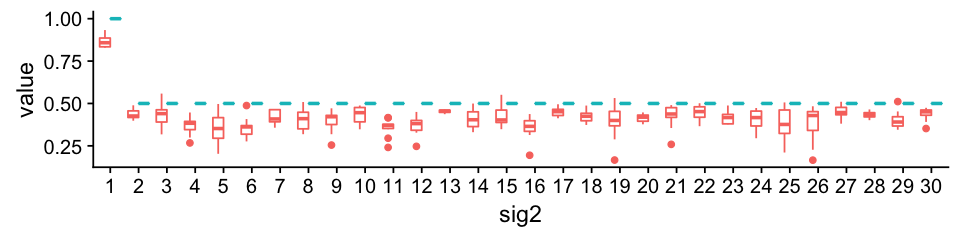

In [26]:
options(repr.plot.width=8, repr.plot.height=2)
d2 = d %>% filter(sigtype == 30 & sig1==1 & ratio==5 & noise==10 & nmut==500 & method != 'mlez' & method != 'ds') %>%
    mutate(sig2=as.factor(sig2))
ggplot(d2) + geom_boxplot(aes(x=sig2, y=value, color=method), show.legend=F)

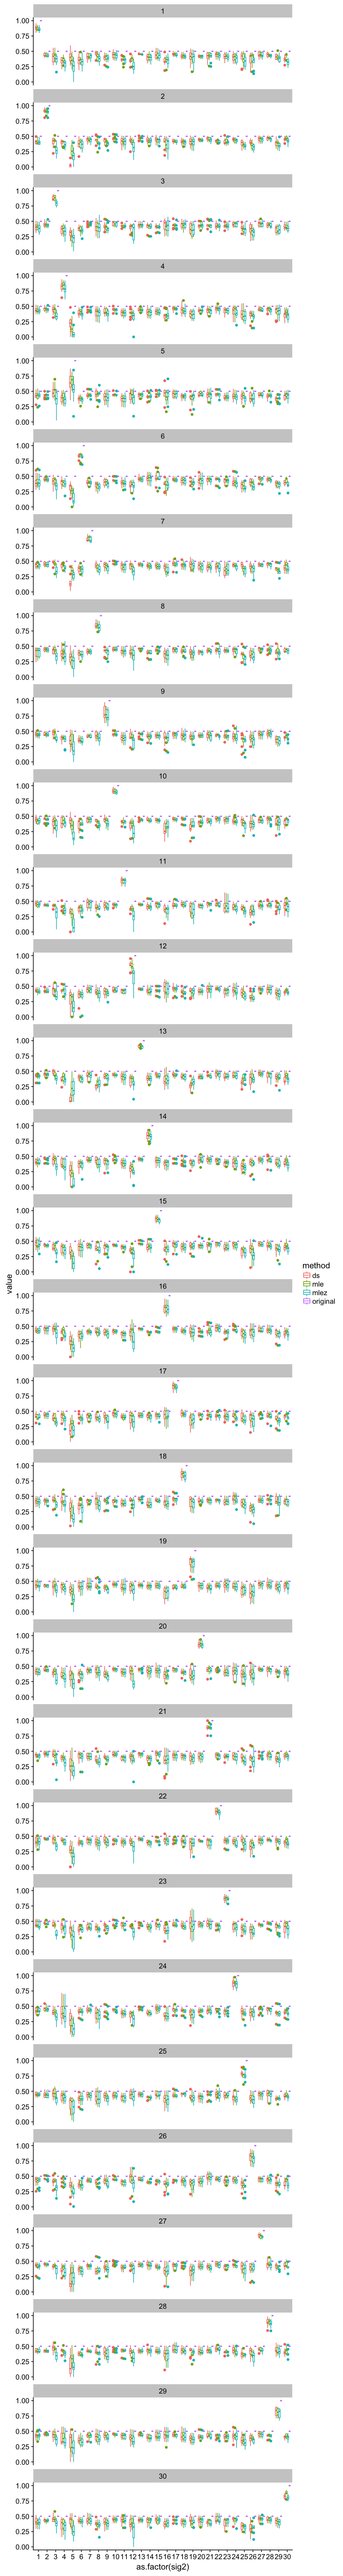

In [14]:
options(repr.plot.width=8, repr.plot.height=2*30)
d2 = d %>% filter(sigtype == 30 & ratio==5 & noise==10 & nmut==500)
ggplot(d2) + geom_boxplot(aes(x=as.factor(sig2), y=value, color=method), show.legend=T) + facet_wrap(~as.factor(sig1), nrow=30)

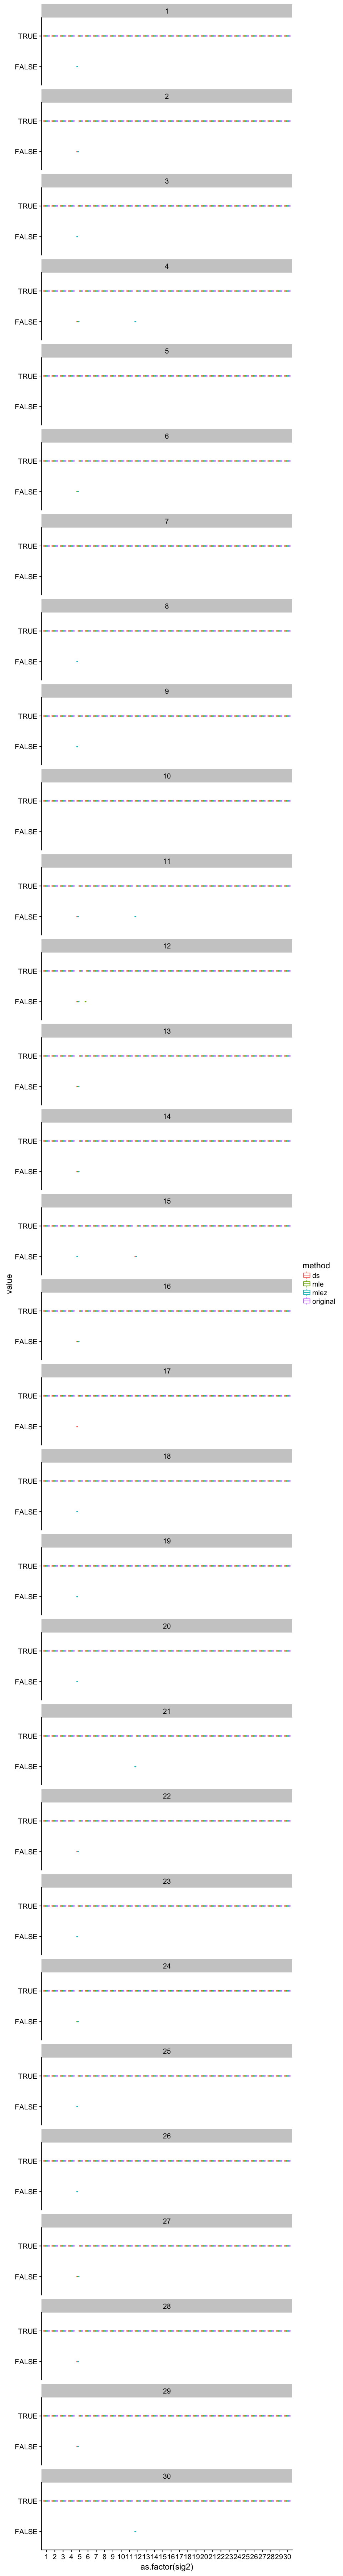

In [18]:
options(repr.plot.width=8, repr.plot.height=2*30)
d2 = d %>%
    filter(sigtype == 30 & ratio==5 & noise==10 & nmut==500) %>%
    mutate(value=value >0.01)
ggplot(d2) + geom_boxplot(aes(x=as.factor(sig2), y=value, color=method), show.legend=T) + facet_wrap(~as.factor(sig1), nrow=30)

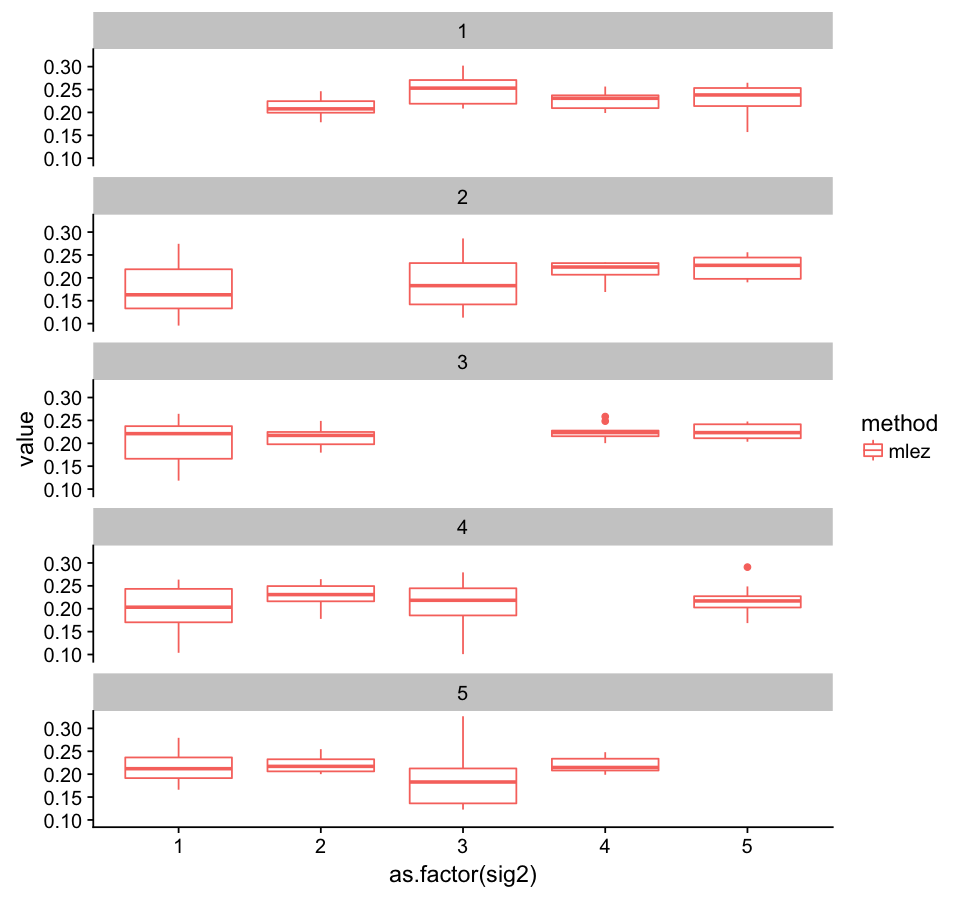

In [13]:
options(repr.plot.width=8, repr.plot.height=1.5*10)
d2 = d %>% filter(sigtype == 5 & ratio==7 & noise==10 & nmut==500 & method=="mlez")
ggplot(d2) + geom_boxplot(aes(x=as.factor(sig2), y=value, color=method), show.legend=T) + facet_wrap(~as.factor(sig1), nrow=5)

In [ ]:
options(repr.plot.width=8, repr.plot.height=2)
d2 = d %>% filter(sigtype == 5 & ratio==7 & noise==20 & nmut==50)
ggplot(d2) + geom_boxplot(aes(x=as.factor(sig2), y=value, color=method), show.legend=T) + facet_wrap(~as.factor(sig1), nrow=1)

In [ ]:
d %>% filter(sigtype == 5) %>%
    group_by(sig1, sig2, nmut, noise, method)    %>%
    summarise(
        n = n(),
        mvalue = mean(value, na.rm = TRUE)
    )

In [ ]:
options(repr.plot.width=8, repr.plot.height=7)
d2 = d %>% filter(sigtype == 10 & ratio==5 & noise==10 & nmut==500)
ggplot(d2) +
geom_boxplot(aes(x=as.factor(sig2), y=value, color=method), show.legend=T) +
facet_wrap(~as.factor(sig1), nrow=5) + 
scale_color_npg()

In [ ]:
options(repr.plot.width=8, repr.plot.height=7)
d2 = d %>% filter(sigtype == 10 & ratio==5 & nmut==500 & method=="mlez")
ggplot(d2) +
geom_boxplot(aes(x=as.factor(sig2), y=value, color=as.factor(noise)), show.legend=T) +
facet_wrap(~as.factor(sig1), nrow=5) + 
scale_color_npg()

In [ ]:
options(repr.plot.width=8, repr.plot.height=7)
d2 = d %>% filter(sigtype == 10 & ratio==7 & noise==10 & method=="mlez")
ggplot(d2) +
geom_boxplot(aes(x=as.factor(sig2), y=value, color=as.factor(nmut)), show.legend=T) +
facet_wrap(~as.factor(sig1), nrow=5) +
scale_color_npg()

In [ ]:
options(repr.plot.width=8, repr.plot.height=7)
d2 = d %>% filter(sigtype == 10 & ratio==7 & nmut==500 & method=="mlez")
ggplot(d2) +
geom_boxplot(aes(x=as.factor(sig2), y=value, color=as.factor(noise)), show.legend=T) +
facet_wrap(~as.factor(sig1), nrow=5) +
scale_color_npg()

In [ ]:
options(repr.plot.width=8, repr.plot.height=7)
d2 = d %>% filter(sigtype == 10 & ratio==7 & nmut==500 & method=="mlez")
ggplot(d2) +
geom_boxplot(aes(x=as.factor(sig2), y=value, color=as.factor(noise)), show.legend=T) +
facet_wrap(~as.factor(sig1), nrow=5) +
scale_color_npg()

In [ ]:
s0 = d %>% filter(sigtype == 10 & ratio == 7) %>%
    group_by(sig1, sig2, nmut, noise, method)    %>%
    summarise(
        n = n(),
        mvalue = mean(value, na.rm = TRUE)
    )
s1 = s0 %>%
    spread(method, mvalue)

s2 = s0 %>%
    spread(nmut, mvalue)

s3 = s0 %>%
    spread(noise, mvalue)

In [ ]:
s2 = s1 %>% mutate(ds = original - ds, mle=original-mle) %>%
    select(-original)

options(repr.plot.width=4, repr.plot.height=2)
plot_grid(ggplot(s2) + geom_histogram(aes(mle)) + theme(axis.text.x = element_text(angle = 90, hjust = 1)),
          ggplot(s2) + geom_histogram(aes(ds)) + theme(axis.text.x = element_text(angle = 90, hjust = 1)),
          labels = c("A", "B"), align = "h")

In [ ]:
options(repr.plot.width=2, repr.plot.height=2)
ggplot(s0 %>% filter(method != "original")) + geom_boxplot(aes(y=mvalue, x=method, fill=method), show.legend=F)

In [ ]:
options(repr.plot.width=4, repr.plot.height=1.8)
plot_grid(ggplot(s2) + geom_point(aes(ds, mle)),
          ggplot(s) + geom_point(aes(ds, mle)),
          labels = c("A", "B"), align = "h")